<function matplotlib.pyplot.show(*args, **kw)>

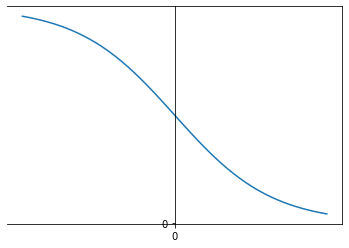

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
nd1=[i for i in range(-30,30)]
n=np.arange(-np.pi,np.pi,0.1)
x=np.linspace(-np.pi, np.pi,50)
#figure(figsize=(8,6), dpi=80)
#plt.figure(figsize=(8,6),dpi=80)
# x制余弦曲xlim(-4.0,4.0)线，使用蓝色的、连续的、宽度为 1 （像素）的线条
#plot(X, C, color="blue", linewidth=1.0, linestyle="-")
"""xmin ,xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
xlim(xmin - dx, xmax + dx)
ylim(ymin - dy, ymax + dy)
"""
y=1/np.exp(x)
plt.xticks([0 ,100,200])
plt.yticks([0, 20])
plt.plot(x,1/(1+np.exp(x)))
ax=plt.gca()
ax.spines['left'].set_position(('data',0))

plt.show



In [80]:

train_x = np.random.random((1,5))
train_x

array([[0.92530296, 0.82898365, 0.53955108, 0.19434972, 0.16459079]])

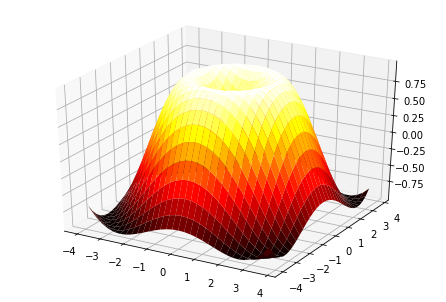

In [2]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

show()

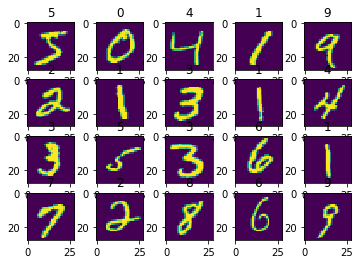

In [4]:
# 安装 TensorFlow
import matplotlib.pyplot as plt
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
def image(r,w,x):
    rw=1
    for i in range(r):
        for ii in range(w):
            plt.subplot(r,w,rw)
            plt.title(y_train[rw+x-1])
            plt.imshow(x_train[rw+x-1])
            rw=rw+1
    plt.show()
image(4,5,0)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.fit(x_train, y_train, epochs=5)


In [17]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 0s - loss: 0.0353 - accuracy: 0.9792


[0.0700932282458758, 0.9792]

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [5]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
print(tf.add(1,2))
print(tf.add([3,8], [2,5]))
print(tf.square(6))
print(tf.reduce_sum([7,8,9]))
print(tf.square(3)+tf.square(4))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([ 5 13], shape=(2,), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(24, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)


In [7]:
x = tf.matmul([[3], [6]], [[2]])
print(x)
print(x.shape)
print(x.dtype)


tf.Tensor(
[[ 6]
 [12]], shape=(2, 1), dtype=int32)
(2, 1)
<dtype: 'int32'>


In [8]:
import numpy as np
ndarray = np.ones((2,2))
print(ndarray)
tensor = tf.multiply(ndarray, 36)
print(tensor)
# 用np.add对tensorflow进行加运算
print(np.add(tensor, 1))
# 转换为numpy类型
print(tensor.numpy())

[[1. 1.]
 [1. 1.]]
tf.Tensor(
[[36. 36.]
 [36. 36.]], shape=(2, 2), dtype=float64)
[[37. 37.]
 [37. 37.]]
[[36. 36.]
 [36. 36.]]


In [12]:
print('Is GPU availabel:')
print(tf.test.is_gpu_available())
print('Is the Tensor on gpu #0:')
print(x.device.endswith('GPU:0'))

Is GPU availabel:
False
Is the Tensor on gpu #0:
False


In [24]:
import time
def time_matmul(x):
    start = time.time()
    for loop in range(10):
        tf.matmul(x, x)
    result = time.time() - start
    print('10 loops: {:0.2}ms'.format(1000*result))
    
# 强制使用CPU
print('On CPU:')
with tf.device('CPU:0'):
    x = tf.random.uniform([1000, 1000])
    # 使用断言验证当前是否为CPU0
    assert x.device.endswith('CPU:0')
    time_matmul(x)    

# 如果存在GPU,强制使用GPU
if tf.test.is_gpu_available():
    print('On GPU:')
    with tf.device.endswith('GPU:0'):
        x = tf.random.uniform([1000, 1000])
    # 使用断言验证当前是否为GPU0
    assert x.device.endswith('GPU:0')
    time_matmul(x)

On CPU:
10 loops: 5.8e+01ms


In [25]:
with tf.device('CPU:1'):
   
    # 使用断言验证当前是否为CPU0
    assert x.device.endswith('CPU:1')
    time_matmul(x)    

RuntimeError: /job:localhost/replica:0/task:0/device:CPU:1 unknown device.

In [54]:
if tf.test.is_gpu_available():
    tf.device('GPU:0')
    x = tf.random.uniform([1000, 1000])
    x.device.endswith('GPU:0')

In [ ]:
# 机器学习